### Two Qubit Circuits

In [1]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qutip import *

#### 2.  Double qubit circuit

Basis states: $|00 \rangle, |01 \rangle, |10 \rangle,|11 \rangle $

$ \psi _{2q} = \alpha |00 \rangle + \beta |01 \rangle + \gamma |10 \rangle + \delta |11 \rangle $ where $\alpha,\beta,\gamma, \delta \in \mathcal{C}^{4}$

$\alpha^{2} + \beta^{2} + \gamma^{2} +  \delta^{2} = 1$


###### 2.1. $I \otimes U$

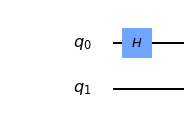

In [10]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw(output='mpl')

In [11]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]]


In [12]:
H = np.array([[ 0.707+0.j,  0.707-0.j],[ 0.707+0.j, -0.707+0.j]])
I = np.eye(2)
np.kron(I,H)

array([[ 0.707+0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j, -0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j],
       [ 0.   +0.j, -0.   +0.j,  0.707+0.j, -0.707+0.j]])

###### 2.2. $U \otimes I$

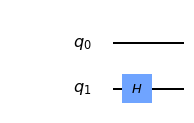

In [13]:
qc = QuantumCircuit(2)
qc.h(1)
qc.draw(output='mpl')

In [14]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[ 0.707+0.j  0.   +0.j  0.707-0.j  0.   +0.j]
 [ 0.   +0.j  0.707+0.j  0.   +0.j  0.707-0.j]
 [ 0.707+0.j  0.   +0.j -0.707+0.j  0.   +0.j]
 [ 0.   +0.j  0.707+0.j  0.   +0.j -0.707+0.j]]


In [15]:
H = np.array([[ 0.707+0.j,  0.707-0.j],[ 0.707+0.j, -0.707+0.j]])
I = np.eye(2)
np.kron(H,I)

array([[ 0.707+0.j,  0.   +0.j,  0.707+0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j,  0.707+0.j],
       [ 0.707+0.j,  0.   +0.j, -0.707+0.j, -0.   +0.j],
       [ 0.   +0.j,  0.707+0.j, -0.   +0.j, -0.707+0.j]])

###### 2.3 $U \otimes U$

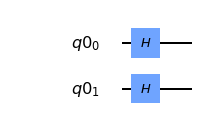

In [16]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

In [17]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[ 0.5+0.j  0.5-0.j  0.5-0.j  0.5-0.j]
 [ 0.5+0.j -0.5+0.j  0.5-0.j -0.5+0.j]
 [ 0.5+0.j  0.5-0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5-0.j]]


In [18]:
H = np.array([[ 0.707+0.j,  0.707-0.j],[ 0.707+0.j, -0.707+0.j]])
np.kron(H,H)

array([[ 0.499849+0.j,  0.499849+0.j,  0.499849+0.j,  0.499849+0.j],
       [ 0.499849+0.j, -0.499849+0.j,  0.499849+0.j, -0.499849+0.j],
       [ 0.499849+0.j,  0.499849+0.j, -0.499849+0.j, -0.499849+0.j],
       [ 0.499849+0.j, -0.499849+0.j, -0.499849+0.j,  0.499849-0.j]])

#### 2.4.  $(U \otimes U) \times (U\otimes U)$

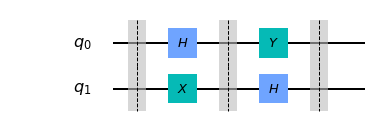

In [54]:
qc = QuantumCircuit(2)
qc.barrier()
qc0 = qc.copy()
qc.h(0)
qc.x(1)
qc.barrier()
qc1 = qc.copy()
qc.y(0)
qc.h(1)
qc.barrier()
qc2 = qc.copy()
qc.draw(output='mpl')

In [57]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

[[-0.-0.5j  0.+0.5j  0.-0.5j  0.+0.5j]
 [ 0.+0.5j  0.+0.5j  0.+0.5j  0.+0.5j]
 [ 0.+0.5j -0.-0.5j  0.-0.5j  0.+0.5j]
 [-0.-0.5j -0.-0.5j  0.+0.5j  0.+0.5j]]


#### Operator : $(H \otimes Y) \times (X\otimes H)$

In [58]:
H = np.array([[ 0.707+0.j,  0.707-0.j],[ 0.707+0.j, -0.707+0.j]])
X = sigmax()
Y = sigmay()
XKH = np.kron(X,H)
HKY = np.kron(H,Y)
np.dot(HKY,XKH)

array([[0.-0.499849j, 0.+0.499849j, 0.-0.499849j, 0.+0.499849j],
       [0.+0.499849j, 0.+0.499849j, 0.+0.499849j, 0.+0.499849j],
       [0.+0.499849j, 0.-0.499849j, 0.-0.499849j, 0.+0.499849j],
       [0.-0.499849j, 0.-0.499849j, 0.+0.499849j, 0.+0.499849j]])

In [59]:
backend = Aer.get_backend('statevector_simulator')
qc_vec = []
for qc in [qc0,qc1,qc2]:
    out = execute(qc,backend).result().get_statevector()
    qc_vec.append(out)
    print(out)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.        +0.j 0.        +0.j 0.70710678+0.j 0.70710678+0.j]
[-6.123234e-17-0.5j  6.123234e-17+0.5j  6.123234e-17+0.5j
 -6.123234e-17-0.5j]


#### State Vectors

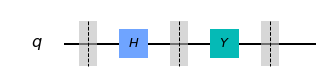

In [60]:
qca = QuantumCircuit(1)

qca.barrier()
qca0 = qca.copy()
qca.h(0)

qca.barrier()
qca1 = qca.copy()
qca.y(0)

qca.barrier()
qca2 = qca.copy()
qca.draw(output='mpl')

In [61]:
backend = Aer.get_backend('statevector_simulator')
qca_vec = []
for qc in [qca0,qca1,qca2]:
    out = execute(qc,backend).result().get_statevector()
    qca_vec.append(out)
    print(out)

[1.+0.j 0.+0.j]
[0.70710678+0.j 0.70710678+0.j]
[0.-0.70710678j 0.+0.70710678j]


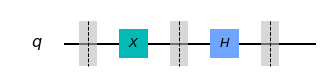

In [62]:
qcb = QuantumCircuit(1)

qcb.barrier()
qcb0 = qcb.copy()
qcb.x(0)

qcb.barrier()
qcb1 = qcb.copy()
qcb.h(0)

qcb.barrier()
qcb2 = qcb.copy()
qcb.draw(output='mpl')

In [63]:
backend = Aer.get_backend('statevector_simulator')
qcb_vec = []
for qc in [qcb0,qcb1,qcb2]:
    out = execute(qc,backend).result().get_statevector()
    qcb_vec.append(out)
    print(out)

[1.+0.j 0.+0.j]
[0.+0.j 1.+0.j]
[ 0.70710678-8.65956056e-17j -0.70710678+8.65956056e-17j]


$\psi_{2q} = \psi_{q} \otimes \psi_{q}$

In [64]:
for qcv,qcav,qcbv in zip(qc_vec,qca_vec,qcb_vec):
    print(qcv,"|", np.kron(qcbv,qcav))

[1.+0.j 0.+0.j 0.+0.j 0.+0.j] | [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.        +0.j 0.        +0.j 0.70710678+0.j 0.70710678+0.j] | [0.        +0.j 0.        +0.j 0.70710678+0.j 0.70710678+0.j]
[-6.123234e-17-0.5j  6.123234e-17+0.5j  6.123234e-17+0.5j
 -6.123234e-17-0.5j] | [-6.123234e-17-0.5j  6.123234e-17+0.5j  6.123234e-17+0.5j
 -6.123234e-17-0.5j]


------------------